# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels import *
import math
%matplotlib inline


In [3]:
df = pd.read_csv('data/human_body_temperature.csv')
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### For Question 1 I examined the distribution of the temperature by creating a histogram of the variable. 

According the the histogram below the temperatures are approximately normally distributed.

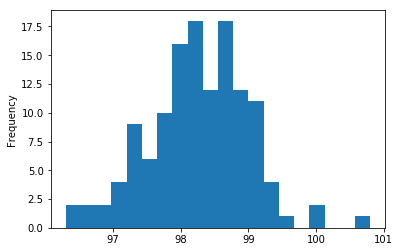

In [35]:
df.temperature.plot.hist(bins=20)

### For Question 2 I examined the sample size and independence of observations.  

The sample size in the given dataset is 130 observations.  We can consider this a large sample size.  Although we cannot tell based on the dataset that the observations are independent of one another we can assume that each observation is independent of the next for the purpose of this exercise.

In [36]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

### Question number 3 involves examining if the true population mean is really 98.6 degrees F.  In order to make this determination I will conduct a t-test of a single mean.  I am choosing to use the t-test because the population standard deviation is not known, making a z-test innappropriate.   

In [37]:
stats.ttest_1samp(df["temperature"], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

According to the above analysis we reject the null hypothesis that the mean temperature in the population is 98.6 degrees since the p value is well below a significance level of .05.

While it may not be the most appropriate we can also examine the z statistic in relation to this question.

First I will compute the z statistic and then compare it to the critical z value of ±1.96 for an alpha value of .05.  The z statistic is computed as follows:
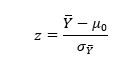

In [38]:
zstat_obs=(98.249231-98.6)/(0.733183/math.sqrt(130))
zstat_obs

-5.454820879461186

According the the above analysis we would make the same conclusion using the z-test and reject the null hypothesis since -5.4548 is well below the critical value of -1.96.

### Question number 4 involves determining what temperature should we consider someone's temperature to be "abnormal".

In order to examine this I will first compute the margin of error which is caluculated by mulitplying the the critical value (95% two tailed) of the t-test by the standard deviation of the population.  In this case we estimate the population standard deviation by using our sampling standard deviation divided by the square root of the sample size.  

In [39]:
moe=1.97852448*(0.733183/math.sqrt(130))
moe

0.12722783546169739

Next I will use the margin or error to compute the 95% confidence interval.

In [40]:
temp_CI=(98.249231 - moe,
         98.249231 + moe) 
temp_CI

(98.1220031645383, 98.37645883546169)

The resulting computation results in a 95% confidence interval for temperature ranging from 98.122 to 98.376.  Thus any body temperature outside of this range can be considered to be "abnormal".

### Question number 5 involves examining if there is a potential difference between males and females. 

In order to investgate gender differences I will conduct a two sample t-test.

In [41]:
df.groupby("gender").describe()

heart_rate                                                     \
            count       mean       std   min   25%   50%   75%   max   
gender                                                                 
F            65.0  74.153846  8.105227  57.0  68.0  76.0  80.0  89.0   
M            65.0  73.369231  5.875184  58.0  70.0  73.0  78.0  86.0   

       temperature                                                      
             count       mean       std   min   25%   50%   75%    max  
gender                                                                  
F             65.0  98.393846  0.743488  96.4  98.0  98.4  98.8  100.8  
M             65.0  98.104615  0.698756  96.3  97.6  98.1  98.6   99.5

In [42]:
female=df[df.gender=="F"]
female=df["temperature"]
male = df[df.gender=="M"]
male=df["temperature"]

In [43]:
stats.ttest_ind(female, male)

Ttest_indResult(statistic=0.0, pvalue=1.0)

The two sample t-test leaves us with an observed t statistic of 0.0 with a pvalue of 1 indicating that we fail to reject the null hypothesis that the mean temperature for males and females are equal.  Thus, according to these results indicate that both females and males both have mean body temperatures that are significantly different from the 98.6 degree value reported by Carl Wunderlich.